In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset

df = pd.read_csv('/kaggle/input/cleaned-electronic-components-data/cleaned_electronic_components.csv')


In [3]:
# Convert 'Last Revision Date' to datetime
df['Last Revision Date'] = pd.to_datetime(df['Last Revision Date'], errors='coerce')



In [4]:
# Display basic info
print("\nDataset Overview:")
print(df.info())




Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Part Number         500 non-null    object        
 1   Voltage (V)         500 non-null    float64       
 2   Current (A)         500 non-null    float64       
 3   Compliance          336 non-null    object        
 4   Lifecycle Stage     500 non-null    object        
 5   Last Revision Date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 23.6+ KB
None


In [5]:
# Display first few rows
print("\nFirst 5 Rows:")
print(df.head())


First 5 Rows:
  Part Number  Voltage (V)  Current (A) Compliance Lifecycle Stage  \
0     PN-0000         5.62        3.494        NaN     End-of-Life   
1     PN-0001        11.50        2.685      REACH        Obsolete   
2     PN-0002         9.27        1.555        NaN     End-of-Life   
3     PN-0003         7.91        4.071        NaN          Active   
4     PN-0004         3.39        3.427       RoHS  Pre-Production   

  Last Revision Date  
0         2015-01-04  
1         2015-01-11  
2         2015-01-18  
3         2015-01-25  
4         2015-02-01  


In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Part Number             0
Voltage (V)             0
Current (A)             0
Compliance            164
Lifecycle Stage         0
Last Revision Date      0
dtype: int64


In [7]:
# Summary statistics
print("\nStatistical Summary:")
print(df.describe())



Statistical Summary:
       Voltage (V)  Current (A)   Last Revision Date
count   500.000000   500.000000                  500
mean      6.885460     2.414968  2019-10-16 12:00:00
min       1.850000     0.033000  2015-01-04 00:00:00
25%       4.262500     1.153250  2017-05-26 06:00:00
50%       7.035000     2.364500  2019-10-16 12:00:00
75%       9.515000     3.634250  2022-03-07 18:00:00
max      11.930000     4.999000  2024-07-28 00:00:00
std       3.046442     1.424596                  NaN


In [8]:
# Count unique lifecycle stages and compliance categories
print("\nLifecycle Stage Distribution:")
print(df['Lifecycle Stage'].value_counts())

print("\nCompliance Category Distribution:")
print(df['Compliance'].value_counts())



Lifecycle Stage Distribution:
Lifecycle Stage
Active            133
End-of-Life       128
Pre-Production    121
Obsolete          118
Name: count, dtype: int64

Compliance Category Distribution:
Compliance
REACH    169
RoHS     167
Name: count, dtype: int64


In [9]:
# ------- VISUALIZATIONS ------- #

# Set style for plots
sns.set(style="whitegrid")

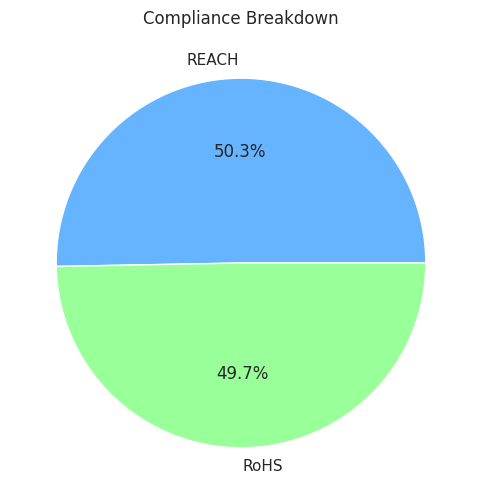

In [10]:
# 1. Compliance Breakdown (Pie Chart)
plt.figure(figsize=(6,6))
df['Compliance'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ff9999'])
plt.title("Compliance Breakdown")
plt.ylabel("")
plt.show()

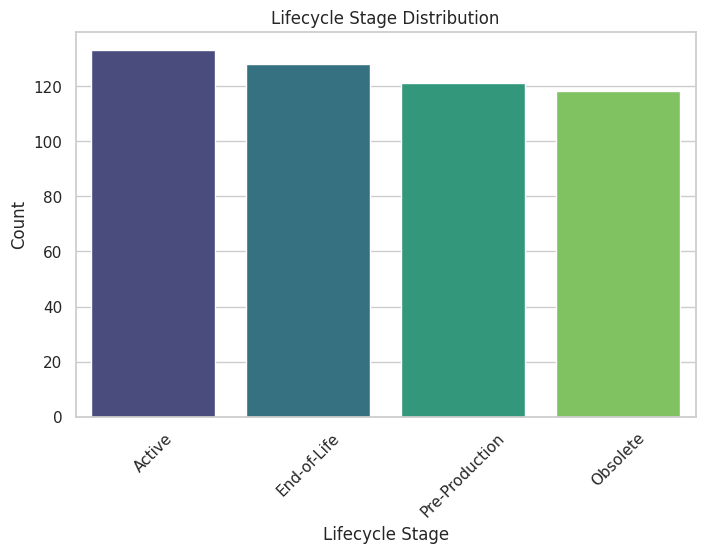

In [11]:
# 2. Lifecycle Stage Distribution (Bar Chart)
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Lifecycle Stage", palette="viridis", order=df["Lifecycle Stage"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Lifecycle Stage Distribution")
plt.xlabel("Lifecycle Stage")
plt.ylabel("Count")
plt.show()

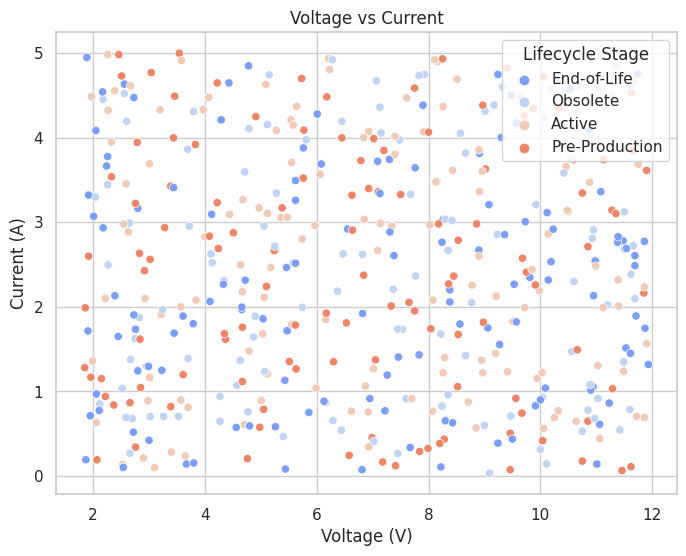

In [12]:
# 3. Voltage vs. Current (Scatter Plot)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Voltage (V)", y="Current (A)", hue="Lifecycle Stage", palette="coolwarm")
plt.title("Voltage vs Current")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)")
plt.show()

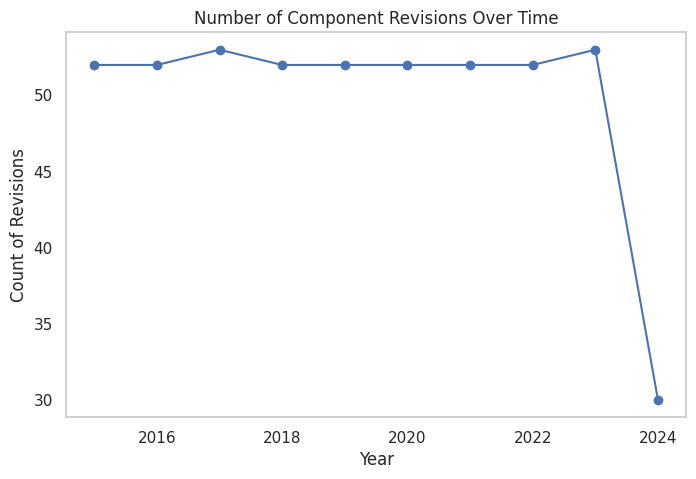

In [13]:
# 4. Revision Date Trend (Line Chart)
df['Last Revision Year'] = df['Last Revision Date'].dt.year
revision_trend = df.groupby("Last Revision Year")["Part Number"].count()

plt.figure(figsize=(8,5))
plt.plot(revision_trend, marker="o", linestyle="-", color="b")
plt.title("Number of Component Revisions Over Time")
plt.xlabel("Year")
plt.ylabel("Count of Revisions")
plt.grid()
plt.show()